In [5]:
import time
import torch
from torch import nn, optim
import sys
import PIL
from torchvision import transforms
from torchvision import datasets
import os
from torchvision import models
import matplotlib.pyplot as plt
import random
import numpy as np
import torchvision.transforms.functional as TF
from torchsummary import summary

In [6]:
sys.path.append("..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
#import utilsd2lzh_pytorch as d2l #zip file added in project folder rename utils to utilsd2lzh_pytorch then add in colab directory

In [7]:
device = torch.device('cuda:0')
data_dir = r"./sorted_dataset_v2"

In [8]:
print(f"Is cuda available? {torch.cuda.is_available()}")
print(f"Which is the current device? {torch.cuda.current_device()}")
print(f"How many devices do we have? {torch.cuda.device_count()}")
print(f"How is the current device named? {torch.cuda.get_device_name(torch.cuda.current_device())}")

Is cuda available? True
Which is the current device? 0
How many devices do we have? 1
How is the current device named? Tesla M60


In [9]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),) for x in ['train', 'valid','test']}

traindataset = image_datasets['train']
validdataset = image_datasets['valid']
testdataset = image_datasets['test']

In [10]:
print(f"Total Images in Training Set: {len(image_datasets['train'])}")
print(f"Total Images in Testing Set: {len(image_datasets['test'])}")
print(f"Total Images in Validation Set: {len(image_datasets['valid'])}")

Total Images in Training Set: 3928
Total Images in Testing Set: 490
Total Images in Validation Set: 493


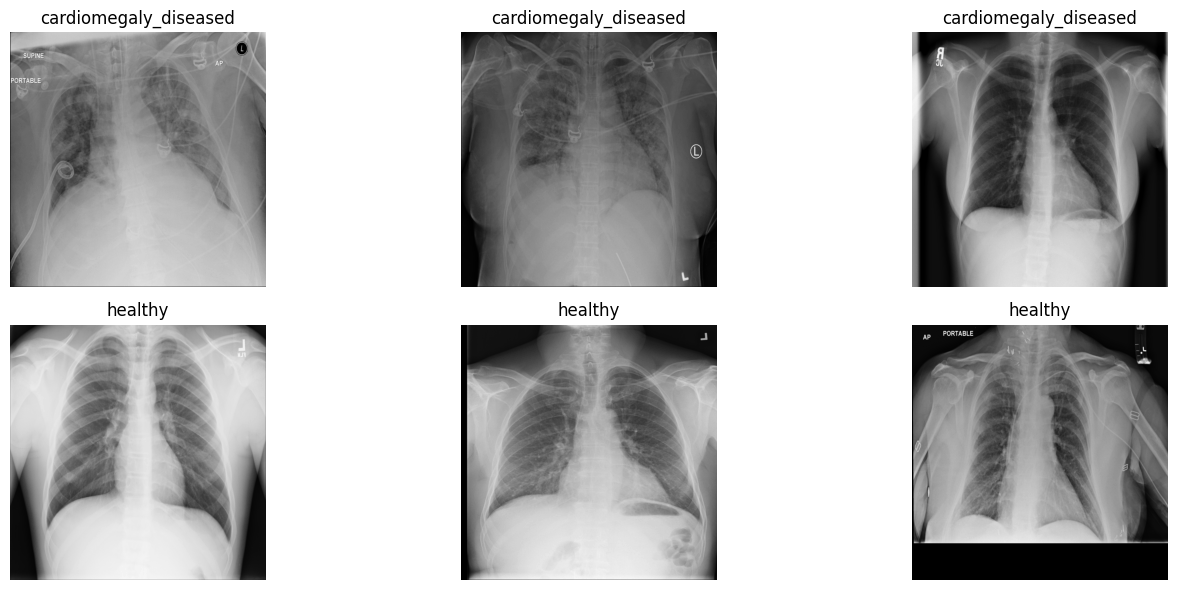

In [11]:
# Get the class names from the dataset
class_names = traindataset.classes

# Plot images from both classes
num_images_per_class = 3  # Number of images to plot per class

# Set up the figure with subplots
fig, axes = plt.subplots(2, num_images_per_class, figsize=(15, 6))

# Iterate over the classes
for i, class_name in enumerate(class_names):
    # Get the indices of images belonging to the current class
    indices = [index for index, (_, label) in enumerate(traindataset.imgs) if label == i]
    
    # Select random indices for plotting
    random_indices = random.sample(indices, num_images_per_class)
    
    # Plot the images
    for j, index in enumerate(random_indices):
        # Get the image and its corresponding label
        image_path, label = traindataset.imgs[index]
        image = PIL.Image.open(image_path)
        
        # Plot the image in the corresponding subplot
        axes[i, j].imshow(image,cmap = 'gray')
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [13]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid','test']}

traindataset = image_datasets['train']
validdataset = image_datasets['valid']
testdataset = image_datasets['test']

batch_size = 16

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'valid','test']}

print(dataloaders)


traindataloader = dataloaders['train']
validdataloader = dataloaders['valid']
testdataloader = dataloaders['test']

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f8e167f80d0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f8d837a8700>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f8d837a88e0>}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

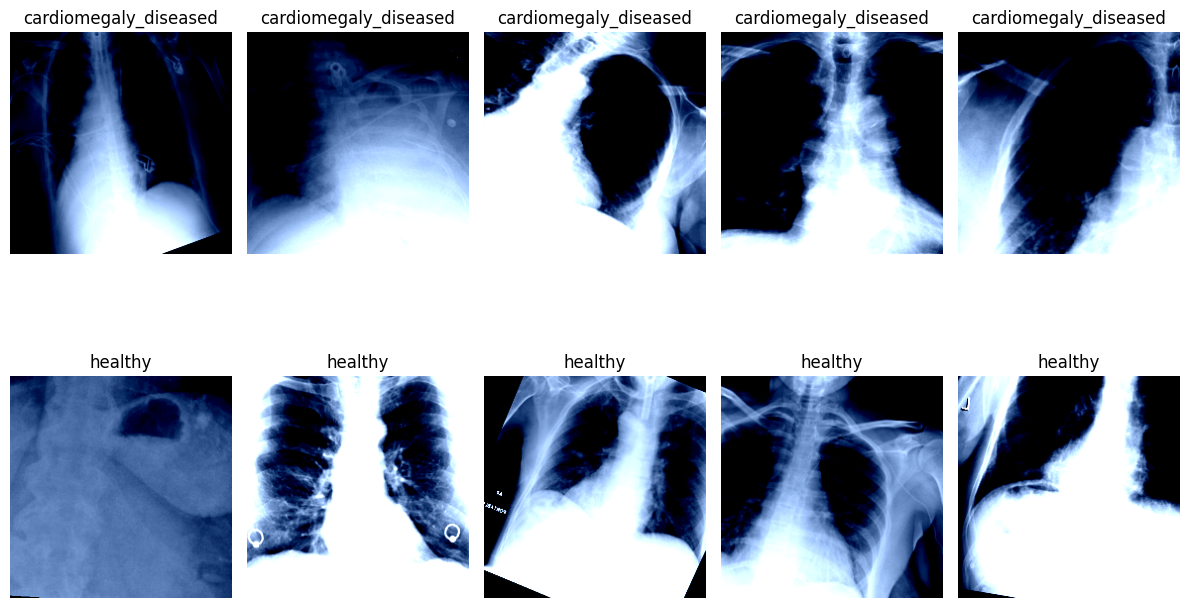

In [14]:
import matplotlib.pyplot as plt
import random

# Get the class names from the dataset
class_names = traindataset.classes

# Plot transformed images from each class
num_images_per_class = 5  # Number of images to plot per class

# Set up the figure with subplots
fig, axes = plt.subplots(len(class_names), num_images_per_class, figsize=(12, 8))

# Iterate over the classes
for i, class_name in enumerate(class_names):
    # Get the indices of images belonging to the current class
    indices = [index for index, (_, label) in enumerate(traindataset.imgs) if label == i]
    
    # Select random indices for plotting
    random_indices = random.sample(indices, num_images_per_class)
    
    # Plot the images
    for j, index in enumerate(random_indices):
        # Get the transformed image and its corresponding label
        image, label = traindataset[index]
        
        # Plot the transformed image in the corresponding subplot
        axes[i, j].imshow(image.permute(1, 2, 0).numpy())
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
class Net(nn.Module):
    def __init__(self, model):
        super(Net, self).__init__()
        self.resnet = nn.Sequential(*list(model.children())[:-1])
        self.fc = nn.Linear(in_features=2048, out_features=2)

    def forward(self, x):
        x = self.resnet(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

resnet152 = models.resnet152(pretrained=True)
net = Net(resnet152)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet152 = resnet152.to(device)

# Print the summary of the model
summary(resnet152, input_size=(3, 224, 224))

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, net.parameters()), lr=0.0001, momentum=0.9)

In [17]:
def valid_model(model, criterion):
    best_acc = 0.0
    running_loss = 0.0
    running_corrects = 0
    model = model.to(device)
    for inputs, labels in validdataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        model.eval()
        with torch.no_grad():
            outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels)
    epoch_loss = running_loss / dataset_sizes['valid']
    epoch_acc = running_corrects.double() / dataset_sizes['valid']
    print('{} Loss: {:.4f} Acc: {:.4f}'.format('valid', epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc.item()

In [18]:
def test_model(model, criterion):
    best_acc = 0.0
    running_loss = 0.0
    running_corrects = 0
    model = model.to(device)
    for inputs, labels in testdataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        model.eval()
        with torch.no_grad():
            outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels)
    epoch_loss = running_loss / dataset_sizes['test']
    epoch_acc = running_corrects.double() / dataset_sizes['test']
    print('{} Loss: {:.4f} Acc: {:.4f}'.format('test', epoch_loss, epoch_acc))

In [19]:
def train_model(model, criterion, optimizer, num_epochs=5):
    since = time.time()
    best_acc = 0.0
    train_loss_values = []
    train_acc_values = []
    valid_loss_values = []
    valid_acc_values = []
    for epoch in range(num_epochs):
        ssince = time.time()
        print('Epoch {}'.format(epoch))
        running_loss = 0.0
        running_corrects = 0
        model = model.to(device)
        for inputs, labels in traindataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            model.train()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels)
        epoch_loss = running_loss / dataset_sizes['train']
        epoch_acc = running_corrects.double() / dataset_sizes['train']
        train_loss_values.append(epoch_loss)
        train_acc_values.append(epoch_acc.item())
        valid_loss, valid_acc = valid_model(model, criterion)
        valid_loss_values.append(valid_loss)
        valid_acc_values.append(valid_acc)
        time_elapsed = time.time() - ssince
        print('Epoch {} Loss: {:.4f} Acc: {:.4f}'.format(epoch, epoch_loss, epoch_acc))
        print('Time elapsed: {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.4f}'.format(max(valid_acc_values)))
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_loss_values, label='Train')
    plt.plot(range(num_epochs), valid_loss_values, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_acc_values, label='Train')
    plt.plot(range(num_epochs), valid_acc_values, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return model

In [20]:
epochs = 200
# model = train_model(net, criterion, optimizer, epochs)
# test_model(model, criterion)
# torch.save(model, r'./models/11_07_23.pkl')
model = torch.load(r'./models/11_07_23.pkl')

In [21]:
def calculate_accuracy(model, dataloader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Total : {total} ")
    print(f"Correct Predictions : {correct}")
    return accuracy

train_accuracy = calculate_accuracy(model, traindataloader)
valid_accuracy = calculate_accuracy(model, validdataloader)
test_accuracy = calculate_accuracy(model, testdataloader)
print('Train Accuracy: {:.2f}%'.format(train_accuracy))
print('Valid Accuracy: {:.2f}%'.format(valid_accuracy))
print('Test Accuracy: {:.2f}%'.format(test_accuracy))


Total : 3928 
Correct Predictions : 3776
Total : 493 
Correct Predictions : 423
Total : 490 
Correct Predictions : 428
Train Accuracy: 96.13%
Valid Accuracy: 85.80%
Test Accuracy: 87.35%


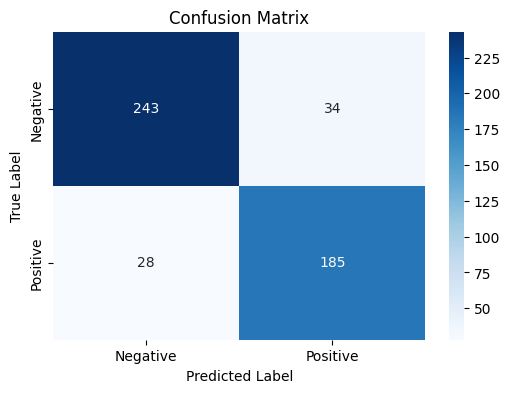

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, dataloader):
    model.eval()
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            true_labels.extend(labels.tolist())
            predicted_labels.extend(predicted.tolist())

    cm = confusion_matrix(true_labels, predicted_labels)
    classes = ['Negative', 'Positive']  # Modify the class labels based on your problem

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(model, testdataloader)


In [23]:
from sklearn.metrics import classification_report

def generate_classification_report(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    report = classification_report(y_true, y_pred)
    print(report)

generate_classification_report(model, testdataloader)


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       277
           1       0.84      0.87      0.86       213

    accuracy                           0.87       490
   macro avg       0.87      0.87      0.87       490
weighted avg       0.87      0.87      0.87       490

